In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import geopandas as gpd
import seaborn as sns
from matplotlib.ticker import ScalarFormatter
import rioxarray
from datetime import datetime
import glob
import os
import contextily as ctx

In [2]:
# these all are in WGS 84
shp = gpd.read_file('/home/etboud/projects/data/shp_out/tuolumne.shp')
Q01_gdf = gpd.read_file('/home/etboud/projects/data/shp_out/Q01.shp')
Q02_gdf = gpd.read_file('/home/etboud/projects/data/shp_out/Q02.shp')
Q03_gdf = gpd.read_file('/home/etboud/projects/data/shp_out/Q03.shp')
Q04_gdf = gpd.read_file('/home/etboud/projects/data/shp_out/Q04.shp')
Q05_gdf = gpd.read_file('/home/etboud/projects/data/shp_out/Q05.shp')
Q06_gdf = gpd.read_file('/home/etboud/projects/data/shp_out/Q06.shp')
rivers = gpd.read_file('/home/etboud/projects/data/shp_out/tuo_rivers.shp')

In [2]:
aso_dir = '/home/etboud/projects/data/aso/'
count_check = len(glob.glob(aso_dir+"*.tif"))

for file in os.listdir(aso_dir):
    fn = glob.glob(aso_dir + "*tif")
    ID_shp = [id.split("/")[-1] for id in fn]
    
    df = pd.DataFrame(data = {
    "filepath": fn, 
    "filename":  [i.split("/")[-1] for i in fn],
    "ID": [id.split("/")[-1].split('.')[0] for id in fn],
    "date": [datetime.strptime(flight.split("/")[-1].split('.')[0].split('_')[-1],'%Y%m%d') for flight in fn],
    "code":[region.split("/")[-1].split('.')[0].split('_')[-2] for region in fn]
    })
    df = df.sort_values("filename", ascending = True)
    
if df.shape[0]!=count_check:
    print("Sanity check didn't pass")
    
    


In [4]:
df

,filepath,filename,ID,date,code
2,/home/etboud/projects/data/aso/ASO_50M_SD_USCA...,ASO_50M_SD_USCACE_20160401.tif,ASO_50M_SD_USCACE_20160401,2016-04-01,USCACE
60,/home/etboud/projects/data/aso/ASO_50M_SD_USCA...,ASO_50M_SD_USCACE_20160407.tif,ASO_50M_SD_USCACE_20160407,2016-04-07,USCACE
62,/home/etboud/projects/data/aso/ASO_50M_SD_USCA...,ASO_50M_SD_USCACE_20160416.tif,ASO_50M_SD_USCACE_20160416,2016-04-16,USCACE
48,/home/etboud/projects/data/aso/ASO_50M_SD_USCA...,ASO_50M_SD_USCACE_20160426.tif,ASO_50M_SD_USCACE_20160426,2016-04-26,USCACE
40,/home/etboud/projects/data/aso/ASO_50M_SD_USCA...,ASO_50M_SD_USCACE_20160509.tif,ASO_50M_SD_USCACE_20160509,2016-05-09,USCACE
...,...,...,...,...,...
16,/home/etboud/projects/data/aso/ASO_50M_SD_USCA...,ASO_50M_SD_USCATB_20180423.tif,ASO_50M_SD_USCATB_20180423,2018-04-23,USCATB
4,/home/etboud/projects/data/aso/ASO_50M_SD_USCA...,ASO_50M_SD_USCATB_20180528.tif,ASO_50M_SD_USCATB_20180528,2018-05-28,USCATB
38,/home/etboud/projects/data/aso/ASO_50M_SD_USCA...,ASO_50M_SD_USCATE_20190324.tif,ASO_50M_SD_USCATE_20190324,2019-03-24,USCATE
59,/home/etboud/projects/data/aso/ASO_50M_SD_USCA...,ASO_50M_SD_USCATE_20190417.tif,ASO_50M_SD_USCATE_20190417,2019-04-17,USCATE


In [3]:
#setting date as index
df.set_index('date',inplace=True)

In [4]:
#curr_y = pd.to_datetime("today").year
#curr_y

#Add DOY and DOWY column
#Need to revisit for leap year support
def add_dowy(df, col=None):
    if col is None:
        df['doy'] = df.index.dayofyear
    else:
        df['doy'] = df[col].dayofyear
    # Sept 30 is doy 273
    df['dowy'] = df['doy'] - 273
    df.loc[df['dowy'] <= 0, 'dowy'] += 365

In [5]:
#run once
add_dowy(df)
df.sort_index(inplace=True)

In [6]:
curr_y=2018
wy = df.loc[f'{curr_y-1}-10-01':f'{curr_y}-09-29']
wy

,filepath,filename,ID,code,doy,dowy
date,,,,,,
2018-03-04,/home/etboud/projects/data/aso/ASO_50M_SD_USCA...,ASO_50M_SD_USCASJ_20180304.tif,ASO_50M_SD_USCASJ_20180304,USCASJ,63,155
2018-04-22,/home/etboud/projects/data/aso/ASO_50M_SD_USCA...,ASO_50M_SD_USCASJ_20180422.tif,ASO_50M_SD_USCASJ_20180422,USCASJ,112,204
2018-04-23,/home/etboud/projects/data/aso/ASO_50M_SD_USCA...,ASO_50M_SD_USCATB_20180423.tif,ASO_50M_SD_USCATB_20180423,USCATB,113,205
2018-04-23,/home/etboud/projects/data/aso/ASO_50M_SD_USCA...,ASO_50M_SD_USCACE_20180423.tif,ASO_50M_SD_USCACE_20180423,USCACE,113,205
2018-04-23,/home/etboud/projects/data/aso/ASO_50M_SD_USCA...,ASO_50M_SD_USCAJW_20180423.tif,ASO_50M_SD_USCAJW_20180423,USCAJW,113,205
2018-04-23,/home/etboud/projects/data/aso/ASO_50M_SD_USCA...,ASO_50M_SD_USCASF_20180423.tif,ASO_50M_SD_USCASF_20180423,USCASF,113,205
2018-04-25,/home/etboud/projects/data/aso/ASO_50M_SD_USCA...,ASO_50M_SD_USCAMB_20180425.tif,ASO_50M_SD_USCAMB_20180425,USCAMB,115,207
2018-05-28,/home/etboud/projects/data/aso/ASO_50M_SD_USCA...,ASO_50M_SD_USCACE_20180528.tif,ASO_50M_SD_USCACE_20180528,USCACE,148,240
2018-05-28,/home/etboud/projects/data/aso/ASO_50M_SD_USCA...,ASO_50M_SD_USCATB_20180528.tif,ASO_50M_SD_USCATB_20180528,USCATB,148,240


In [26]:
tuo_df = df[df['code']=='USCATB']

In [9]:
df[df['code'] == 'USCATB']

,filepath,filename,ID,code,doy,dowy
date,,,,,,
2013-05-25,/home/etboud/projects/data/aso/ASO_50M_SD_USCA...,ASO_50M_SD_USCATB_20130525.tif,ASO_50M_SD_USCATB_20130525,USCATB,145,237
2013-06-01,/home/etboud/projects/data/aso/ASO_50M_SD_USCA...,ASO_50M_SD_USCATB_20130601.tif,ASO_50M_SD_USCATB_20130601,USCATB,152,244
2013-06-08,/home/etboud/projects/data/aso/ASO_50M_SD_USCA...,ASO_50M_SD_USCATB_20130608.tif,ASO_50M_SD_USCATB_20130608,USCATB,159,251
2014-03-23,/home/etboud/projects/data/aso/ASO_50M_SD_USCA...,ASO_50M_SD_USCATB_20140323.tif,ASO_50M_SD_USCATB_20140323,USCATB,82,174
2014-04-07,/home/etboud/projects/data/aso/ASO_50M_SD_USCA...,ASO_50M_SD_USCATB_20140407.tif,ASO_50M_SD_USCATB_20140407,USCATB,97,189
2014-04-13,/home/etboud/projects/data/aso/ASO_50M_SD_USCA...,ASO_50M_SD_USCATB_20140413.tif,ASO_50M_SD_USCATB_20140413,USCATB,103,195
2014-04-20,/home/etboud/projects/data/aso/ASO_50M_SD_USCA...,ASO_50M_SD_USCATB_20140420.tif,ASO_50M_SD_USCATB_20140420,USCATB,110,202
2014-04-28,/home/etboud/projects/data/aso/ASO_50M_SD_USCA...,ASO_50M_SD_USCATB_20140428.tif,ASO_50M_SD_USCATB_20140428,USCATB,118,210
2014-05-02,/home/etboud/projects/data/aso/ASO_50M_SD_USCA...,ASO_50M_SD_USCATB_20140502.tif,ASO_50M_SD_USCATB_20140502,USCATB,122,214


In [6]:
def sc_ratio(df):
    # Filter the DataFrame for code == 'USCATB'
    tuo_df = df[df['code'] == 'USCATB']
    
    # Open and reproject raster files
    rio_aso = rioxarray.open_rasterio(tuo_df['filepath'], mask_and_scale=True)
    rio_proj = rio_aso.rio.reproject("EPSG:4326", nodata=np.nan)
    rio_proj_pos = rio_proj.where((rio_proj > 0) & (rio_proj < 1000))
    
    # Calculate resolutions
    x_res = abs(rio_aso.x[1] - rio_aso.x[0])
    y_res = abs(rio_aso.y[1] - rio_aso.y[0])
    
    # Count total and snow pixels
    tot_pix_num = rio_proj.count(dim=('x', 'y'))
    sc_pix_num = rio_proj_pos.count(dim=('x', 'y'))
    
    # Calculate total and snow-covered area
    tot_area = tot_pix_num * x_res * y_res
    sc_area = sc_pix_num * x_res * y_res
    
    # Calculate snow cover ratio
    sc_ratio = sc_area / tot_area
    
    # Assign calculated values to the DataFrame
    df.loc[df['code'] == 'USCATB', 'sc_ratio'] = sc_ratio
    df.loc[df['code'] == 'USCATB', 'sc_area'] = sc_area
    
# Call the function with your DataFrame
sc_ratio(df)

TypeError: invalid path or file: date
2013-05-25    /home/etboud/projects/data/aso/ASO_50M_SD_USCA...
2013-06-01    /home/etboud/projects/data/aso/ASO_50M_SD_USCA...
2013-06-08    /home/etboud/projects/data/aso/ASO_50M_SD_USCA...
2014-03-23    /home/etboud/projects/data/aso/ASO_50M_SD_USCA...
2014-04-07    /home/etboud/projects/data/aso/ASO_50M_SD_USCA...
2014-04-13    /home/etboud/projects/data/aso/ASO_50M_SD_USCA...
2014-04-20    /home/etboud/projects/data/aso/ASO_50M_SD_USCA...
2014-04-28    /home/etboud/projects/data/aso/ASO_50M_SD_USCA...
2014-05-02    /home/etboud/projects/data/aso/ASO_50M_SD_USCA...
2014-05-11    /home/etboud/projects/data/aso/ASO_50M_SD_USCA...
2014-05-17    /home/etboud/projects/data/aso/ASO_50M_SD_USCA...
2014-05-27    /home/etboud/projects/data/aso/ASO_50M_SD_USCA...
2014-05-31    /home/etboud/projects/data/aso/ASO_50M_SD_USCA...
2014-06-05    /home/etboud/projects/data/aso/ASO_50M_SD_USCA...
2015-02-17    /home/etboud/projects/data/aso/ASO_50M_SD_USCA...
2015-03-05    /home/etboud/projects/data/aso/ASO_50M_SD_USCA...
2015-03-25    /home/etboud/projects/data/aso/ASO_50M_SD_USCA...
2015-04-03    /home/etboud/projects/data/aso/ASO_50M_SD_USCA...
2015-04-09    /home/etboud/projects/data/aso/ASO_50M_SD_USCA...
2015-04-15    /home/etboud/projects/data/aso/ASO_50M_SD_USCA...
2015-05-01    /home/etboud/projects/data/aso/ASO_50M_SD_USCA...
2015-05-28    /home/etboud/projects/data/aso/ASO_50M_SD_USCA...
2016-03-26    /home/etboud/projects/data/aso/ASO_50M_SD_USCA...
2016-04-01    /home/etboud/projects/data/aso/ASO_50M_SD_USCA...
2016-04-07    /home/etboud/projects/data/aso/ASO_50M_SD_USCA...
2016-04-16    /home/etboud/projects/data/aso/ASO_50M_SD_USCA...
2016-04-26    /home/etboud/projects/data/aso/ASO_50M_SD_USCA...
2016-05-09    /home/etboud/projects/data/aso/ASO_50M_SD_USCA...
2016-05-27    /home/etboud/projects/data/aso/ASO_50M_SD_USCA...
2016-06-07    /home/etboud/projects/data/aso/ASO_50M_SD_USCA...
2016-07-08    /home/etboud/projects/data/aso/ASO_50M_SD_USCA...
2017-07-17    /home/etboud/projects/data/aso/ASO_50M_SD_USCA...
2017-07-27    /home/etboud/projects/data/aso/ASO_50M_SD_USCA...
2017-08-16    /home/etboud/projects/data/aso/ASO_50M_SD_USCA...
2018-04-23    /home/etboud/projects/data/aso/ASO_50M_SD_USCA...
2018-05-28    /home/etboud/projects/data/aso/ASO_50M_SD_USCA...
Name: filepath, dtype: object

In [10]:
tuo_df = df[df['code']=='USCATB']

def sc_ratio(df):
    fp = df['filepath']
    for index, row in df.iterrows():
        fp = row['filepath']
        code = row['code']
        rio_aso = rioxarray.open_rasterio(fp, mask_and_scale=True)
        rio_proj = rio_aso.rio.reproject("EPSG:4326",nodata=np.nan)
        rio_proj_pos = rio_proj.where((rio_proj>0)&(rio_proj<1000))
        tot_pix_num = rio_proj.count()
        sc_pix_num = rio_proj_pos.count()
        # get ~50m resolution
        x_res = abs(rio_aso.x[1] - rio_aso.x[0])
        y_res = abs(rio_aso.y[1] - rio_aso.y[0])
        # count number of total number of pixels, including zeros & nan
        tot_pix_num = rio_proj.count()
        # count number of snow pixels
        sc_pix_num = rio_proj_pos.count()

        # calculate total area including zeros & nans 
        tot_area = tot_pix_num*x_res*y_res
        # calculate snow covered area 
        sc_area = sc_pix_num*x_res*y_res

        sc_ratio = sc_area/tot_area
                                
        df.loc[index,'sc_ratio'] = sc_ratio
        df.loc[index,'sc_area'] = sc_area
        
sc_ratio(tuo_df)

/tmp/ipykernel_986626/1567325009.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[index,'sc_ratio'] = sc_ratio
/tmp/ipykernel_986626/1567325009.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[index,'sc_area'] = sc_area


In [29]:
def fun(wy):
    for index, row in wy.iterrows():
        fp = row['filepath']
        code = row['code']
        # Perform different operations based on the value of 'code'
        if code == 'USCATB':
            
            
            # Perform operation for USCATB
            rio_aso = rioxarray.open_rasterio(fp, mask_and_scale=True)
            rio_proj = rio_aso.rio.reproject("EPSG:4326",nodata=np.nan)
            rio_proj_pos = rio_proj.where((rio_proj>0)&(rio_proj<1000))
            tot_pix_num = rio_proj.count()
            sc_pix_num = rio_proj_pos.count()
            # get ~50m resolution
            x_res = abs(rio_aso.x[1] - rio_aso.x[0])
            y_res = abs(rio_aso.y[1] - rio_aso.y[0])
            # count number of total number of pixels, including zeros & nan
            tot_pix_num = rio_proj.count()
            # count number of snow pixels
            sc_pix_num = rio_proj_pos.count()

            # calculate total area including zeros & nans 
            tot_area = tot_pix_num*x_res*y_res
            # calculate snow covered area 
            sc_area = sc_pix_num*x_res*y_res

            sc_ratio = sc_area/tot_area
                
            wy.loc[index,'sc_ratio'] = sc_ratio
            wy.loc[index,'sc_area'] = sc_area
                    
        else:
            # Perform operation for other codes
            print(f"For other code: Processing filepath {fp}")

# Assuming wy is your DataFrame
fun(tuo_df)

/tmp/ipykernel_984627/261299672.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wy.loc[index,'sc_ratio'] = sc_ratio
/tmp/ipykernel_984627/261299672.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wy.loc[index,'sc_area'] = sc_area


In [11]:
tuo_df

,filepath,filename,ID,code,doy,dowy,sc_ratio,sc_area
date,,,,,,,,
2013-05-25,/home/etboud/projects/data/aso/ASO_50M_SD_USCA...,ASO_50M_SD_USCATB_20130525.tif,ASO_50M_SD_USCATB_20130525,USCATB,145,237,0.471364,6.313526e+08
2013-06-01,/home/etboud/projects/data/aso/ASO_50M_SD_USCA...,ASO_50M_SD_USCATB_20130601.tif,ASO_50M_SD_USCATB_20130601,USCATB,152,244,0.396697,5.369597e+08
2013-06-08,/home/etboud/projects/data/aso/ASO_50M_SD_USCA...,ASO_50M_SD_USCATB_20130608.tif,ASO_50M_SD_USCATB_20130608,USCATB,159,251,0.256105,2.886737e+08
2014-03-23,/home/etboud/projects/data/aso/ASO_50M_SD_USCA...,ASO_50M_SD_USCATB_20140323.tif,ASO_50M_SD_USCATB_20140323,USCATB,82,174,0.370231,9.405038e+08
2014-04-07,/home/etboud/projects/data/aso/ASO_50M_SD_USCA...,ASO_50M_SD_USCATB_20140407.tif,ASO_50M_SD_USCATB_20140407,USCATB,97,189,0.392951,9.982190e+08
2014-04-13,/home/etboud/projects/data/aso/ASO_50M_SD_USCA...,ASO_50M_SD_USCATB_20140413.tif,ASO_50M_SD_USCATB_20140413,USCATB,103,195,0.363590,9.236337e+08
2014-04-20,/home/etboud/projects/data/aso/ASO_50M_SD_USCA...,ASO_50M_SD_USCATB_20140420.tif,ASO_50M_SD_USCATB_20140420,USCATB,110,202,0.342387,8.697710e+08
2014-04-28,/home/etboud/projects/data/aso/ASO_50M_SD_USCA...,ASO_50M_SD_USCATB_20140428.tif,ASO_50M_SD_USCATB_20140428,USCATB,118,210,0.375699,9.543939e+08
2014-05-02,/home/etboud/projects/data/aso/ASO_50M_SD_USCA...,ASO_50M_SD_USCATB_20140502.tif,ASO_50M_SD_USCATB_20140502,USCATB,122,214,0.326591,8.296434e+08


In [ ]:
for file in list(wy['filepath']):
    df = wy
    fp = wy['filepath']
    if wy['code']=='USCATB':

In [18]:

for file in list(wy['filepath'])
    fp = wy['filepath']
    if 
    
    

TypeError: 'DatetimeIndex' object is not callable

In [51]:
for filename in glob.glob(aso_dir+"*.tif"):
    file_path = glob.glob(aso_dir + "*tif")
    rio_aso = rioxarray.open_rasterio(filepath, mask_and_scale=True)
    proj_aso = rio_aso.rio.reproject("EPSG:4326",nodata=np.nan)
    pos_aso = proj_aso.where((proj_aso>0)&(proj_aso<1000))
    tot_pix_num = proj_aso.count()
    sc_pix_num = pos_aso.count()
    

'20170815'

In [24]:
# one file
# aso flight filename
#sd_50m = "/home/etboud/projects/data/aso/ASO_50M_SD_USCATB_20140605.tif"
#sd_50m = "/home/etboud/projects/data/aso/ASO_50M_SD_USCASJ_20180422.tif"
#sd_50m = "/home/etboud/projects/data/aso/ASO_50M_SD_USCASF_20190502.tif"
sd_50m = "/home/etboud/projects/data/aso/ASO_50M_SD_USCARC_20150503.tif"
#sd_50m = "/home/etboud/projects/data/aso/ASO_50M_SD_USCAJW_20180423.tif"
#sd_50m = "/home/etboud/projects/data/aso/ASO_50M_SD_USCACE_20180423.tif"
# open .tif file with rioxarray
rio_50m = rioxarray.open_rasterio(sd_50m,mask_and_scale=True)
# reproject to epsg 4326 (lat, lon)
rio_proj = rio_50m.rio.reproject("EPSG:4326",nodata=np.nan)
# mask out any values less than zero and over 10000
rio_proj_pos = rio_proj.where((rio_proj>0)&(rio_proj<1000))


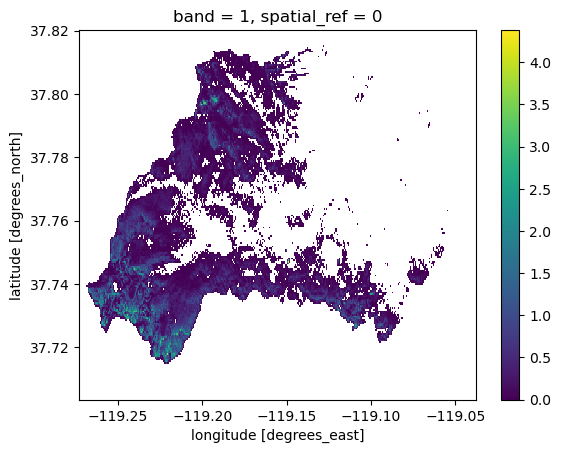

In [25]:
rio_proj_pos.plot()

In [15]:
# get ~50m resolution
x_res = abs(rio_50m.x[1] - rio_50m.x[0])
y_res = abs(rio_50m.y[1] - rio_50m.y[0])
# count number of total number of pixels, including zeros & nan
tot_pix_num = rio_proj.count()
# count number of snow pixels
sc_pix_num = rio_proj_pos.count()

# calculate total area including zeros & nans 
tot_area = tot_pix_num*x_res*y_res
# calculate snow covered area 
sc_area = sc_pix_num*x_res*y_res

sc_ratio = sc_area/tot_area

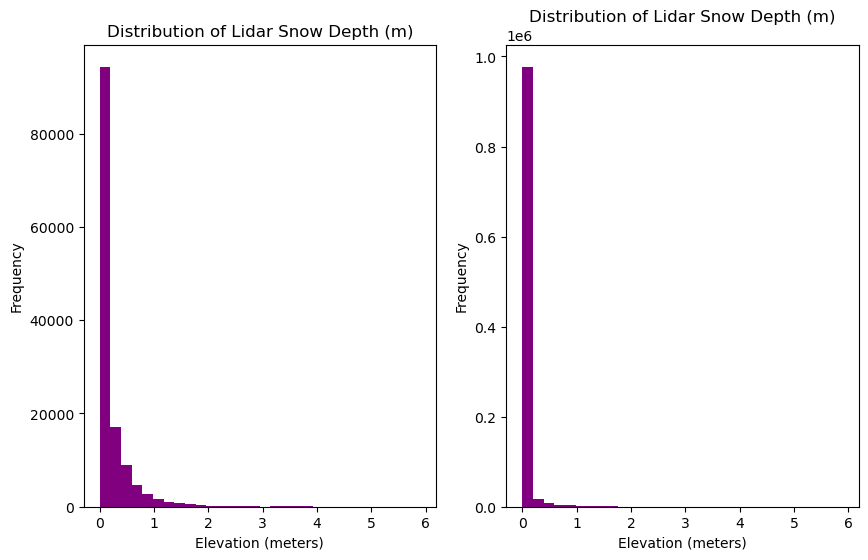

In [45]:
# Plot a histogram
f, ax = plt.subplots(1,2, figsize=(10, 6))
rio_50m_pos.plot.hist(ax=ax[0],
       color="purple", bins=30)
ax[0].set(title="Distribution of Lidar Snow Depth (m)",
       xlabel='Elevation (meters)',
       ylabel='Frequency')
rio_50m.plot.hist(ax=ax[1],
       color="purple", bins=30)
ax[1].set(title="Distribution of Lidar Snow Depth (m)",
       xlabel='Elevation (meters)',
       ylabel='Frequency')
plt.show()

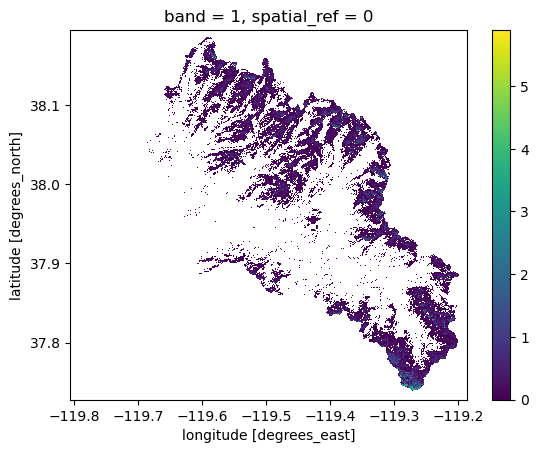

In [7]:
rio_50m_pos.plot()

In [56]:
# 3m reproject and coarsen
# rio_3m=rio_3m.where((rio_3m>0)&(rio_3m<1000))
# rio_30m_4269 = rio_3m.coarsen(x=10,y=10,boundary='pad').median().rio.reproject("EPSG:4269",nodata=np.nan)


In [5]:
clipped = rio_30m_4269.rio.clip(Q01_gdf.geometry.values, crs=Q01_gdf.crs, drop=True)


In [6]:
clipped.rio.nodata


nan

In [19]:
clipped=clipped.rio.write_nodata(np.nan,encoded=True)

In [21]:
clipped.rio.nodata

nan

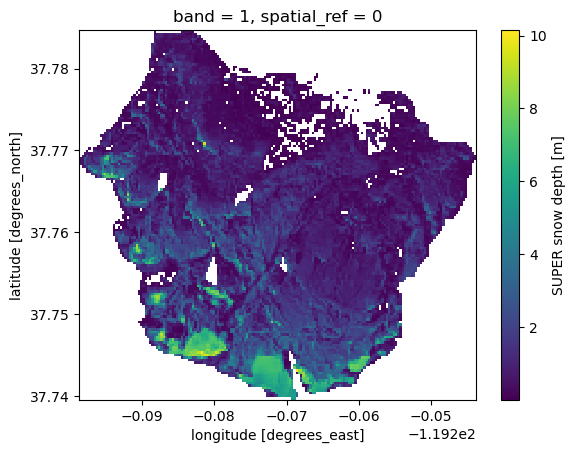

In [7]:
clipped.plot()